Importing the dependencies


In [1348]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

Data Collection and Processing

In [1349]:
heart_data=pd.read_csv('heart_disease_uci.csv')


In [1350]:
heart_data.shape

(920, 16)

In [1351]:
heart_data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [1352]:
heart_data.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [1353]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [1354]:
heart_data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [1355]:
rounded_counts = heart_data['trestbps'].round(2).value_counts()
print(rounded_counts)

trestbps
120.0    131
130.0    115
140.0    102
110.0     59
150.0     56
        ... 
164.0      1
101.0      1
174.0      1
192.0      1
127.0      1
Name: count, Length: 61, dtype: int64


In [1356]:
# Check for missing data summary
missing_data = heart_data.isnull().sum()
missing_percentage = (missing_data / len(heart_data)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
print(missing_info)


          Missing Values  Percentage
id                     0    0.000000
age                    0    0.000000
sex                    0    0.000000
dataset                0    0.000000
cp                     0    0.000000
trestbps              59    6.413043
chol                  30    3.260870
fbs                   90    9.782609
restecg                2    0.217391
thalch                55    5.978261
exang                 55    5.978261
oldpeak               62    6.739130
slope                309   33.586957
ca                   611   66.413043
thal                 486   52.826087
num                    0    0.000000


In [1357]:
# Drop columns with more than 50% missing values
dataset2 = heart_data.copy()
threshold = 50
dataset2 = dataset2.drop(columns=missing_info[missing_info['Percentage'] > threshold].index)

In [1358]:
dataset2.shape

(920, 14)

In [1359]:
dataset2.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
num           0
dtype: int64

In [1360]:
# Impute missing values for numerical columns with the median
num_columns = dataset2.select_dtypes(include=['float64', 'int64']).columns
dataset2[num_columns] = dataset2[num_columns].fillna(dataset2[num_columns].median())

In [1361]:
# Impute missing values for categorical columns with the mode
cat_columns = dataset2.select_dtypes(include=['object']).columns
dataset2[cat_columns] = dataset2[cat_columns].fillna(dataset2[cat_columns].mode().iloc[0])

/var/folders/d6/5fr0x1t16nd3p1p3pf22hc_00000gn/T/ipykernel_72101/2925394590.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset2[cat_columns] = dataset2[cat_columns].fillna(dataset2[cat_columns].mode().iloc[0])


In [1362]:
dataset2.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64

In [1363]:
dataset2.describe()

,id,age,trestbps,chol,thalch,oldpeak,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,460.500000,53.510870,131.995652,199.908696,137.692391,0.853261,0.995652
std,265.725422,9.424685,18.451300,109.040171,25.145235,1.058049,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,230.750000,47.000000,120.000000,177.750000,120.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,1.000000
75%,690.250000,60.000000,140.000000,267.000000,156.000000,1.500000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [1364]:
dataset2['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

The target column is num which is the predicted attribute.
We will use this to predict the heart disease. The values in the column are [0,1,2,3,4], which state there are 5 stages of heart disease

0 = no heart disease

1 = mild heart disease

2 = moderate heart disease

3 = severe heaert disease

4 = critical heart disease

Converting the 'num' to binary

0 : no disease

1 : any disease stage

In [1365]:
dataset2['binary_num'] = dataset2['num'].apply(lambda x: 0 if x == 0 else 1)

# Check the distribution
print(dataset2['binary_num'].value_counts())


binary_num
1    509
0    411
Name: count, dtype: int64


In [1366]:
dataset2.binary_num

0      0
1      1
2      1
3      0
4      0
      ..
915    1
916    0
917    1
918    0
919    1
Name: binary_num, Length: 920, dtype: int64

In [1367]:
dataset2

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num,binary_num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,2,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,1,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,flat,1,1
916,917,62,Male,VA Long Beach,typical angina,130.0,139.0,False,st-t abnormality,140.0,False,0.5,flat,0,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,flat,2,1
918,919,58,Male,VA Long Beach,asymptomatic,130.0,385.0,True,lv hypertrophy,140.0,False,0.5,flat,0,0


LABEL ENCODING-converts the labels into numeric values

In [1368]:
categorical_cols = [col for col in ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope'] if col in dataset2.columns]
label_encoders = {}
for col in categorical_cols:
    label_encode = LabelEncoder() #load the label encoder function
    dataset2[col] = label_encode.fit_transform(dataset2[col])
    label_encoders[col] = label_encode



In [1369]:
dataset2

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num,binary_num
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0,0
1,2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,2,1
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,1,1
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0,0
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,0,3,0,127.0,333.0,1,2,154.0,0,0.0,1,1,1
916,917,62,1,3,3,130.0,139.0,0,2,140.0,0,0.5,1,0,0
917,918,55,1,3,0,122.0,223.0,1,2,100.0,0,0.0,1,2,1
918,919,58,1,3,0,130.0,385.0,1,0,140.0,0,0.5,1,0,0


In [1370]:
#scale numeric features

dataset2.drop(columns=['id'],inplace=True)


In [1371]:
X = dataset2.drop(columns=['num', 'binary_num'])
Y = dataset2['binary_num']


In [1372]:
#splitting the data into Training data and test data

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=42, stratify=Y)

STANDARDIZE THE DATA

In [1373]:
#Scale the features 

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

MODEL TRAINING

In [1374]:
#Logistic Regression
log_reg=LogisticRegression(C=1.0,penalty='l2', solver='lbfgs')
log_reg.fit(X_train_scaled,Y_train)
Y_pred_log_reg=log_reg.predict(X_test_scaled)

#Random Forest Classifier
rf_clf=RandomForestClassifier(
    n_estimators=200,max_depth=10,min_samples_split=5,min_samples_leaf=2,  max_features='sqrt', class_weight='balanced')
rf_clf.fit(X_train,Y_train)
Y_pred_rf=rf_clf.predict(X_test)

#Gradient Boosting Classifer
gb_clf=GradientBoostingClassifier(n_estimators=200,learning_rate=0.05,max_depth=3,subsample=0.8,min_samples_split=5)
gb_clf.fit(X_train, Y_train)
Y_pred_gb=gb_clf.predict(X_test)

#k-Nearest Neighbors Classifer
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, Y_train)
Y_pred_knn=knn.predict(X_test_scaled)

#Train Extra Trees
et_clf=ExtraTreesClassifier(n_estimators=200,max_depth=10,min_samples_split=4,min_samples_leaf=2,max_features='sqrt')
et_clf.fit(X_train, Y_train)
Y_pred_et=et_clf.predict(X_test)


#Train AdaBoost
ada_clf=AdaBoostClassifier( n_estimators=300,learning_rate=0.05)
ada_clf.fit(X_train, Y_train)
Y_pred_ada=ada_clf.predict(X_test)

#Train XGBoost
xgb_clf=XGBClassifier(use_label_encoder=False, eval_metric='logloss',random_state=43)
xgb_clf.fit(X_train,Y_train)
Y_pred_xgb=xgb_clf.predict(X_test)

#Train LightGBM
lgbm_clf=LGBMClassifier(
    num_leaves=40,               
    max_depth=5 or 10,
    learning_rate=0.05,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight='balanced'
)
lgbm_clf.fit(X_train, Y_train)
Y_pred_lgbm = lgbm_clf.predict(X_test)




/opt/homebrew/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [01:15:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 407, number of negative: 329
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 367
[LightGBM] [Info] Number of data points in the train set: 736, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

EVALUATE MODELS

In [1375]:
print("Logistic Regression Accuracy:", accuracy_score(Y_test,Y_pred_log_reg))
print("Random Forest Accuracy      :", accuracy_score(Y_test,Y_pred_rf))
print("Gradient Boosting Accuracy  :", accuracy_score(Y_test,Y_pred_gb))
print("KNN Accuracy                :", accuracy_score(Y_test,Y_pred_knn))
print("Extra Trees Accuracy        :", accuracy_score(Y_test,Y_pred_et))
print("AdaBoost Accuracy           :", accuracy_score(Y_test,Y_pred_ada))
print("XGBoost  Accuracy           :", accuracy_score(Y_test,Y_pred_xgb))
print("LightGBM  Accuracy          :", accuracy_score(Y_test,Y_pred_lgbm))

Logistic Regression Accuracy: 0.8315217391304348
Random Forest Accuracy      : 0.8369565217391305
Gradient Boosting Accuracy  : 0.8315217391304348
KNN Accuracy                : 0.842391304347826
Extra Trees Accuracy        : 0.8260869565217391
AdaBoost Accuracy           : 0.8369565217391305
XGBoost  Accuracy           : 0.8369565217391305
LightGBM  Accuracy          : 0.8152173913043478


Detailed Classification Report

In [1376]:
print("\nLogistic Regression Classification Report:\n", classification_report(Y_test,Y_pred_log_reg))
print("\nRandom Forest Classification Report:\n", classification_report(Y_test,Y_pred_rf))
print("\nGradient Boosting Classification Report:\n", classification_report(Y_test,Y_pred_gb))
print("\nKNN Classification Report:\n", classification_report(Y_test,Y_pred_knn))
print("\nExtra Trees Classification Report:\n", classification_report(Y_test,Y_pred_et))
print("\nAdaBoost Classification Report:\n", classification_report(Y_test,Y_pred_ada))
print("\nXGBoost Classification Report:\n", classification_report(Y_test,Y_pred_xgb))
print("\nLightGBM Classification Report:\n", classification_report(Y_test,Y_pred_lgbm))



Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81        82
           1       0.84      0.86      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81        82
           1       0.84      0.87      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184


Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.77      0.80        82
           1       0.83      0.88      0.85       102

    accuracy                           0.83       184
 

Confusion Matrix

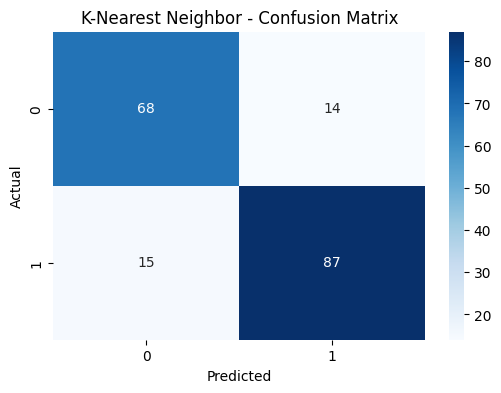

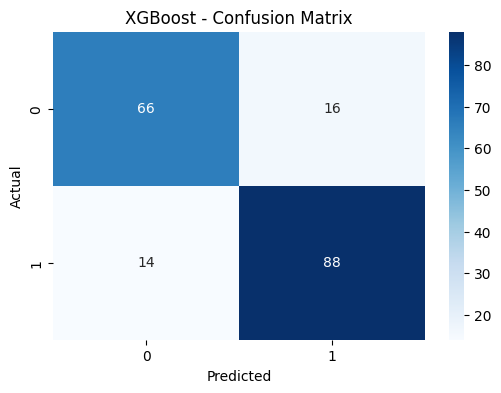

In [1377]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Example
plot_confusion_matrix(Y_test, Y_pred_knn, "K-Nearest Neighbor")
plot_confusion_matrix(Y_test, Y_pred_xgb, "XGBoost")


Plotting the most important features in the model based on their relative importance scores

/var/folders/d6/5fr0x1t16nd3p1p3pf22hc_00000gn/T/ipykernel_72101/2198365274.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features, palette="viridis")


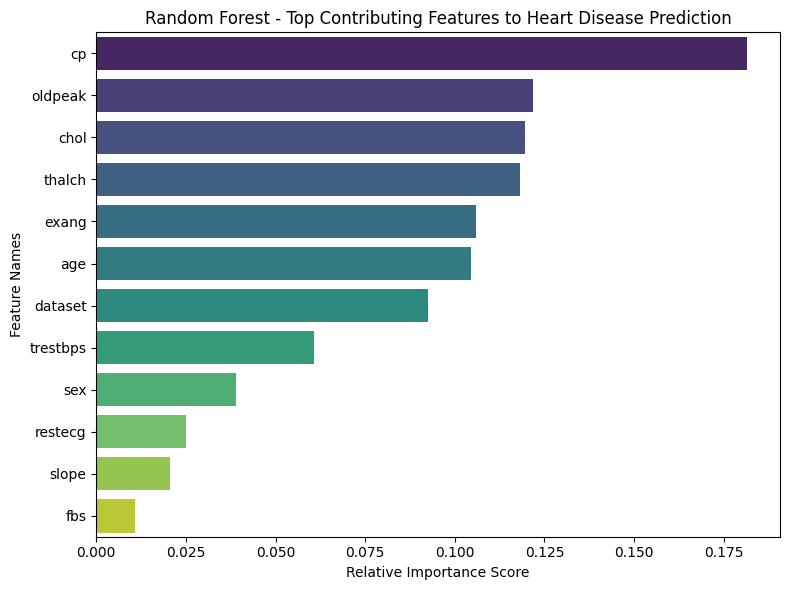

/var/folders/d6/5fr0x1t16nd3p1p3pf22hc_00000gn/T/ipykernel_72101/2198365274.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features, palette="viridis")


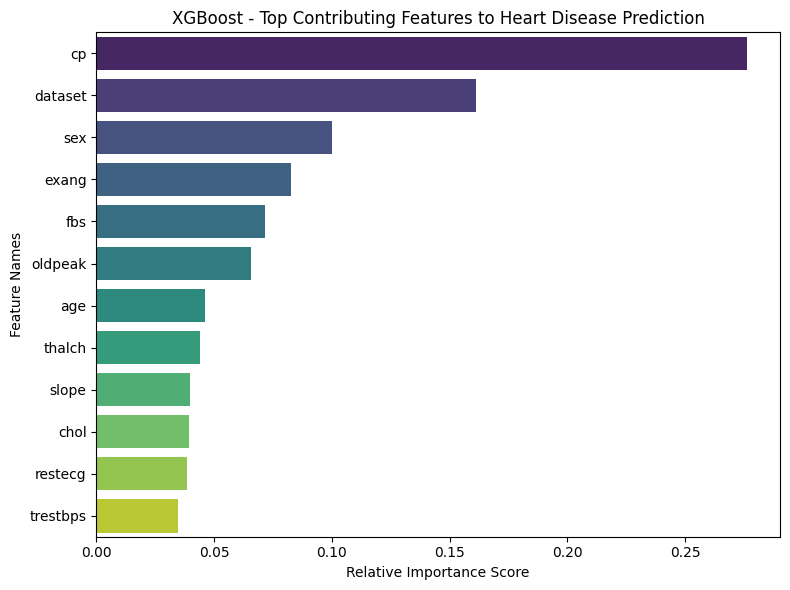

/var/folders/d6/5fr0x1t16nd3p1p3pf22hc_00000gn/T/ipykernel_72101/2198365274.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features, palette="viridis")


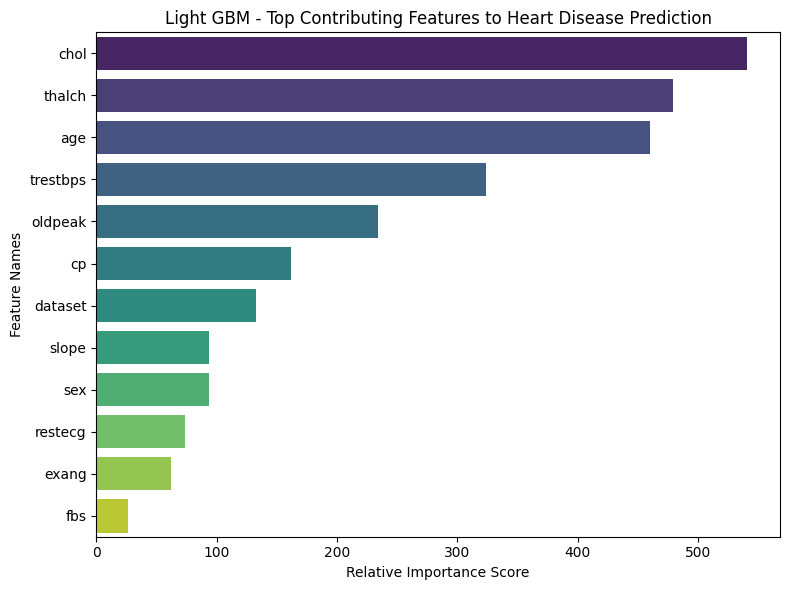

/var/folders/d6/5fr0x1t16nd3p1p3pf22hc_00000gn/T/ipykernel_72101/2198365274.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features, palette="viridis")


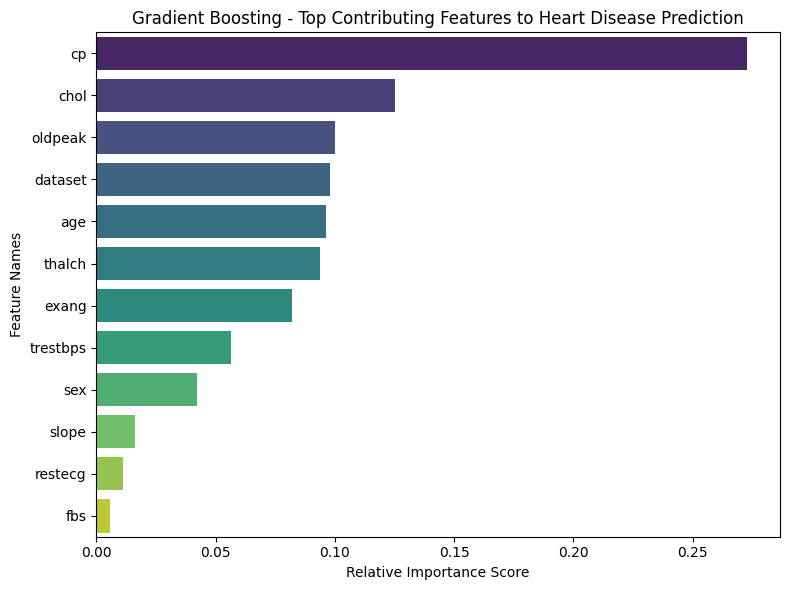

/var/folders/d6/5fr0x1t16nd3p1p3pf22hc_00000gn/T/ipykernel_72101/2198365274.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features, palette="viridis")


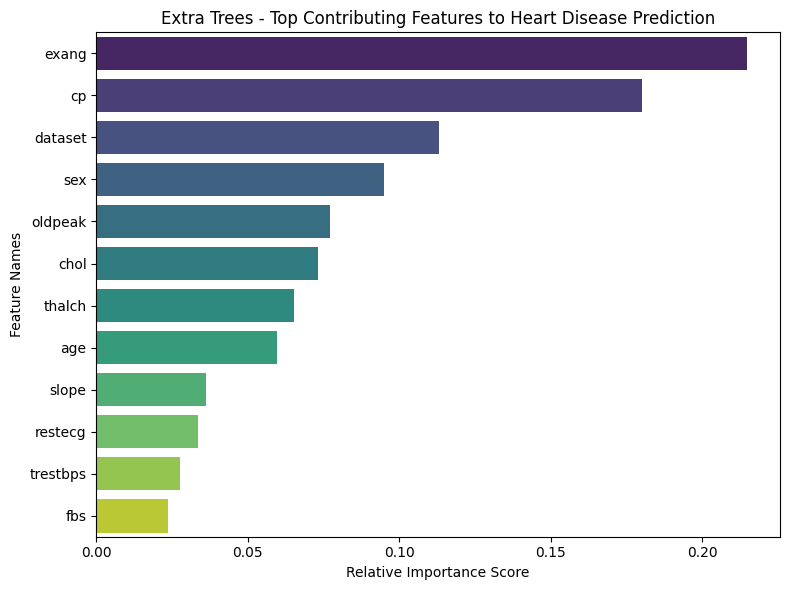

/var/folders/d6/5fr0x1t16nd3p1p3pf22hc_00000gn/T/ipykernel_72101/2198365274.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features, palette="viridis")


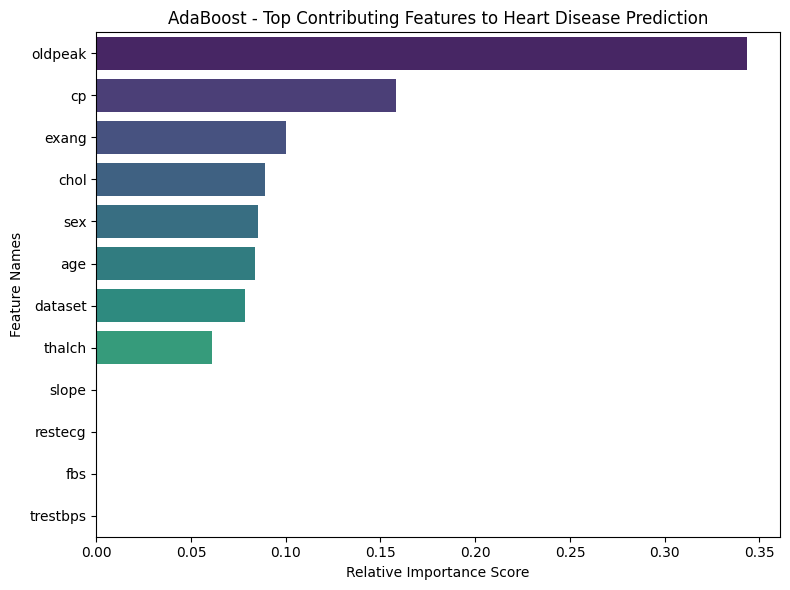

In [1378]:
def plot_feature_importance(model, model_name):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    features = X.columns[indices]

    
    plt.figure(figsize=(8, 6))
    sns.barplot(x=importances[indices], y=features, palette="viridis")
    
    plt.title(f'{model_name} - Top Contributing Features to Heart Disease Prediction')
    plt.xlabel('Relative Importance Score')
    plt.ylabel('Feature Names')
    plt.tight_layout()
    plt.show()

plot_feature_importance(rf_clf, "Random Forest")
plot_feature_importance(xgb_clf, "XGBoost")
plot_feature_importance(lgbm_clf, "Light GBM")
plot_feature_importance(gb_clf, "Gradient Boosting")
plot_feature_importance(et_clf, "Extra Trees")
plot_feature_importance(ada_clf, "AdaBoost")






Plotting the distribution of the binary target variable

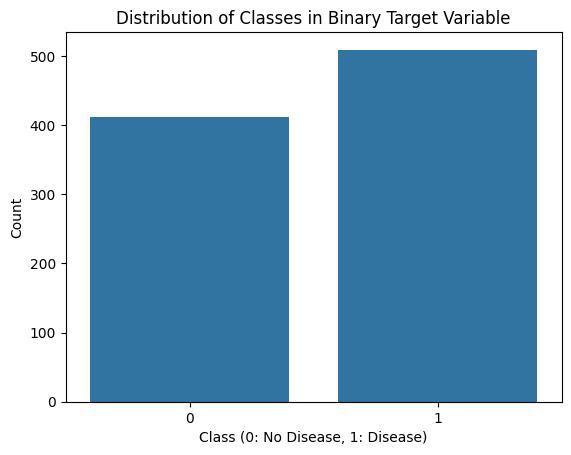

In [1379]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='binary_num', data=dataset2)
plt.title('Distribution of Classes in Binary Target Variable')
plt.xlabel('Class (0: No Disease, 1: Disease)')
plt.ylabel('Count')
plt.show()


Comparision of the Model's Accuracy

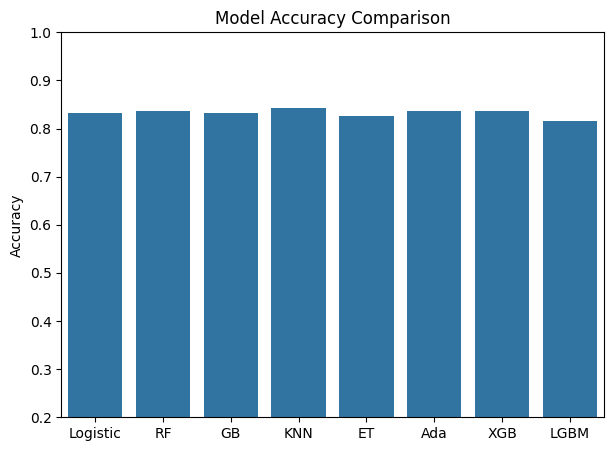

In [1380]:
model_names = ['Logistic', 'RF', 'GB', 'KNN', 'ET', 'Ada', 'XGB', 'LGBM']
accuracies = [
    accuracy_score(Y_test, Y_pred_log_reg),
    accuracy_score(Y_test, Y_pred_rf),
    accuracy_score(Y_test, Y_pred_gb),
    accuracy_score(Y_test, Y_pred_knn),
    accuracy_score(Y_test, Y_pred_et),
    accuracy_score(Y_test, Y_pred_ada),
    accuracy_score(Y_test, Y_pred_xgb),
    accuracy_score(Y_test, Y_pred_lgbm)
]

plt.figure(figsize=(7, 5))
sns.barplot(x=model_names, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.2, 1)
plt.show()
